# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


['port-aux-francais', 'grytviken', 'rmi capitol', 'badger', 'waitangi']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&appid="+ weather_api_key
print(url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

   
    try:
        # Run an API request for each of the cities
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["city"]["coord"]["lat"]
        city_lng = city_weather["city"]["coord"]["lon"]
        city_max_temp = city_weather["list"][0]["main"]["temp_max"]
        city_humidity = city_weather["list"][0]["main"]["humidity"]
        city_clouds = city_weather["list"][0]["clouds"]["all"]
        city_wind = city_weather["list"][0]["wind"]["speed"]
        city_country = city_weather["city"]["country"]
        city_date = datetime.datetime.utcfromtimestamp(city_weather["list"][0]["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city and identify city eror
    except Exception as e:
        print(f"Error processing {city}:{e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/forecast?id=524901&appid=7147f0595a3c4cb3cf7c8243ae3f7e8f
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | rmi capitol
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | san antonio de pale
Processing Record 8 of Set 1 | sirjan
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | kuragino
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | fuvahmulah
Error processing fuvahmulah:'city'
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | mitsamiouli
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record

Error processing espargos:'city'
Processing Record 34 of Set 4 | mount gambier
Processing Record 35 of Set 4 | kaga bandoro
Processing Record 36 of Set 4 | benin city
Processing Record 37 of Set 4 | tarawa
Processing Record 38 of Set 4 | pangai
Processing Record 39 of Set 4 | port-vila
Processing Record 40 of Set 4 | lesnoy
Processing Record 41 of Set 4 | goundi
Processing Record 42 of Set 4 | arteche
Processing Record 43 of Set 4 | tukrah
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | newman
Processing Record 46 of Set 4 | brisas de zicatela
Processing Record 47 of Set 4 | cadereyta
Processing Record 48 of Set 4 | dudinka
Processing Record 49 of Set 4 | ongjin
Processing Record 0 of Set 5 | hongch'on
Processing Record 1 of Set 5 | acarau
Processing Record 2 of Set 5 | westport
Processing Record 3 of Set 5 | selfoss
Processing Record 4 of Set 5 | znamenskoye
Processing Record 5 of Set 5 | vadso
Processing Record 6 of Set 5 | sandpoint
Processing Record 7 of Set 

Processing Record 28 of Set 8 | boende
Processing Record 29 of Set 8 | ginir
Processing Record 30 of Set 8 | haiku-pauwela
Processing Record 31 of Set 8 | son ferrer
Error processing son ferrer:'city'
Processing Record 32 of Set 8 | kaspiyskiy
Processing Record 33 of Set 8 | suva
Processing Record 34 of Set 8 | victorica
Processing Record 35 of Set 8 | sonsorol village
Error processing sonsorol village:'city'
Processing Record 36 of Set 8 | gamla uppsala
Processing Record 37 of Set 8 | saint-felix-de-valois
Processing Record 38 of Set 8 | canchungo
Processing Record 39 of Set 8 | ta`u
Processing Record 40 of Set 8 | yamada
Processing Record 41 of Set 8 | nizhneudinsk
Processing Record 42 of Set 8 | priego de cordoba
Processing Record 43 of Set 8 | pacific grove
Processing Record 44 of Set 8 | talcahuano
Processing Record 45 of Set 8 | miedzychod
Processing Record 46 of Set 8 | hammerfest
Processing Record 47 of Set 8 | fuling
Processing Record 48 of Set 8 | babylon
Processing Record 49

Processing Record 14 of Set 12 | mogadishu
Processing Record 15 of Set 12 | marsabit
Processing Record 16 of Set 12 | podujeva
Processing Record 17 of Set 12 | allapalli
Processing Record 18 of Set 12 | camana
Processing Record 19 of Set 12 | mersrags
Processing Record 20 of Set 12 | kirensk
Processing Record 21 of Set 12 | sao joao da barra
Processing Record 22 of Set 12 | kingscliff
Processing Record 23 of Set 12 | natal
Processing Record 24 of Set 12 | rodolfo sanchez taboada
Processing Record 25 of Set 12 | le port
Processing Record 26 of Set 12 | emerald
Processing Record 27 of Set 12 | baglung
Processing Record 28 of Set 12 | lagoa
Processing Record 29 of Set 12 | ilhabela
Processing Record 30 of Set 12 | lamin
Processing Record 31 of Set 12 | hohhot
Processing Record 32 of Set 12 | justiniano posse
Processing Record 33 of Set 12 | kloulklubed
Processing Record 34 of Set 12 | shihezi
Processing Record 35 of Set 12 | jorhat
Processing Record 36 of Set 12 | al kharijah
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,275.23,56,69,4.36,TF,2023-07-17 03:00:00
1,grytviken,-54.2811,-36.5092,267.52,87,65,1.68,GS,2023-07-17 03:00:00
2,rmi capitol,7.0893,171.3805,303.18,71,48,6.13,MH,2023-07-17 03:00:00
3,badger,64.8000,-147.5333,293.64,53,100,1.33,US,2023-07-17 03:00:00
4,waitangi,-43.9535,-176.5597,283.81,77,100,13.79,NZ,2023-07-17 03:00:00


In [6]:
# Export the City_Data into a csv
output_data_file = "output_cities.csv"

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.23,56,69,4.36,TF,2023-07-17 03:00:00
1,grytviken,-54.2811,-36.5092,267.52,87,65,1.68,GS,2023-07-17 03:00:00
2,rmi capitol,7.0893,171.3805,303.18,71,48,6.13,MH,2023-07-17 03:00:00
3,badger,64.8000,-147.5333,293.64,53,100,1.33,US,2023-07-17 03:00:00
4,waitangi,-43.9535,-176.5597,283.81,77,100,13.79,NZ,2023-07-17 03:00:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

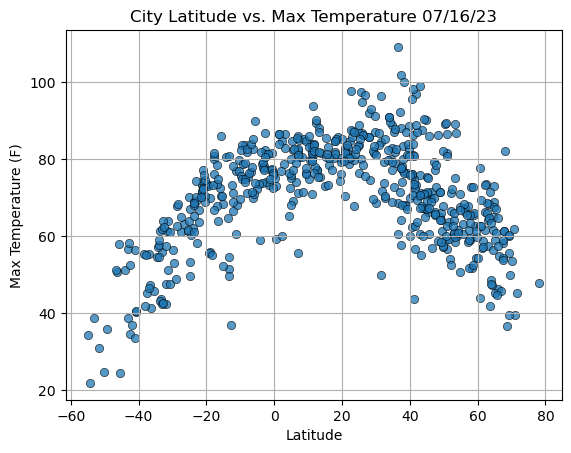

In [8]:
# Define variables for scatterplot
lat = city_data_df["Lat"]
lng = city_data_df["Lng"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#Convert Kelvin to Fahrenheit for max temp:
f_max_temp = (max_temp -273.15)* 9/5 + 32

# Build Scatter plot
plt.scatter(lat,
            f_max_temp,
            edgecolor ="black",
            linewidths=0.5,
            marker = "o", alpha = 0.75, label = "Cities")

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

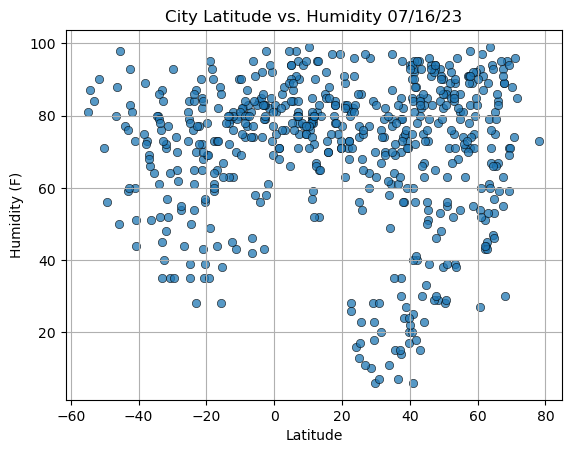

In [9]:
# Build Scatter plot
plt.scatter(lat,
            humidity,
            edgecolor ="black",
            linewidths=0.5,
            marker = "o", alpha = 0.75, label = "Cities")

plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

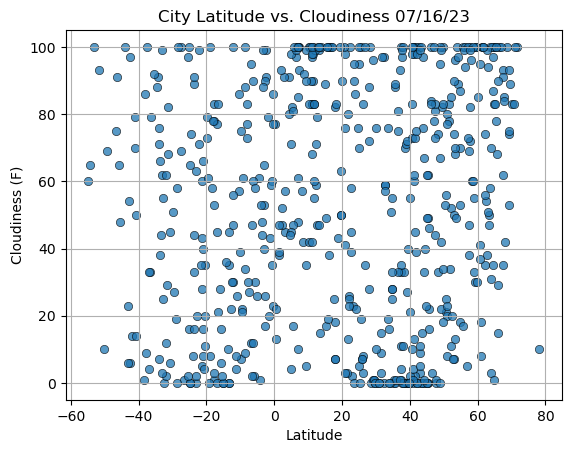

In [10]:
# Build Scatter plot
plt.scatter(lat,
            cloudiness,
            edgecolor ="black",
            linewidths=0.5,
            marker = "o", alpha = 0.75, label = "Cities")

plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

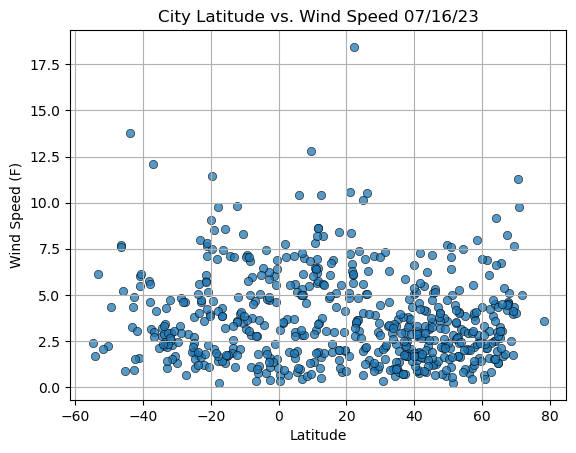

In [11]:
# Build Scatter plot
plt.scatter(lat,
            wind_speed,
            edgecolor ="black",
            linewidths=0.5,
            marker = "o", alpha = 0.75, label = "Cities")

plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, y_label, annotate_pos):
    
    #Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    regression = x * slope +intercept
    
    #Equation of line
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    #Scatterplot and regression line
    plt.scatter(x,y)
    plt.plot(x, regression, "r")
    
    #Annotate text for line
    plt.annotate(line_eq, annotate_pos, fontsize = 15, color = "navy")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    #Print R value and P value 
    print(f"R value is {rvalue}")
    print(f"P value is {pvalue}")

In [13]:
#Convert Kelvin to Fahrenheit for max temp:
city_data_df["Max Temp 'F'"] = (max_temp -273.15)* 9/5 + 32

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp 'F'
City_ID,,,,,,,,,,
2,rmi capitol,7.0893,171.3805,303.18,71,48,6.13,MH,2023-07-17 03:00:00,86.054
3,badger,64.8000,-147.5333,293.64,53,100,1.33,US,2023-07-17 03:00:00,68.882
7,sirjan,29.4520,55.6814,300.69,18,1,3.00,IR,2023-07-17 03:00:00,81.572
9,qaqortoq,60.7167,-46.0333,279.76,93,95,0.68,GL,2023-07-17 03:00:00,43.898
12,kuragino,53.8975,92.6725,288.76,96,100,3.15,RU,2023-07-17 03:00:00,60.098


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp 'F'
City_ID,,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.23,56,69,4.36,TF,2023-07-17 03:00:00,35.744
1,grytviken,-54.2811,-36.5092,267.52,87,65,1.68,GS,2023-07-17 03:00:00,21.866
4,waitangi,-43.9535,-176.5597,283.81,77,100,13.79,NZ,2023-07-17 03:00:00,51.188
5,blackmans bay,-43.0167,147.3167,286.78,59,23,4.32,AU,2023-07-17 03:00:00,56.534
6,san antonio de pale,-1.4014,5.6325,296.06,82,20,6.03,GQ,2023-07-17 03:00:00,73.238


###  Temperature vs. Latitude Linear Regression Plot

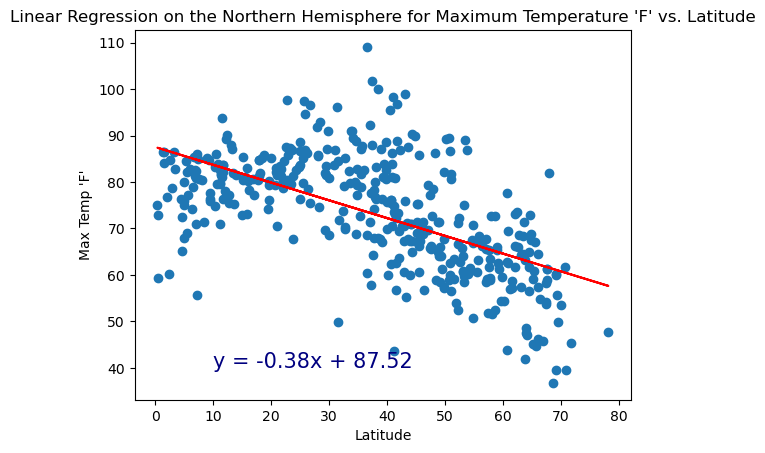

R value is -0.6019537124548804
P value is 8.558488808729597e-41


In [16]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp 'F'"]

#Call line function
plot_linear_regression(x, y,"Linear Regression on the Northern Hemisphere for Maximum Temperature 'F' vs. Latitude", "Max Temp 'F'", (10,40))

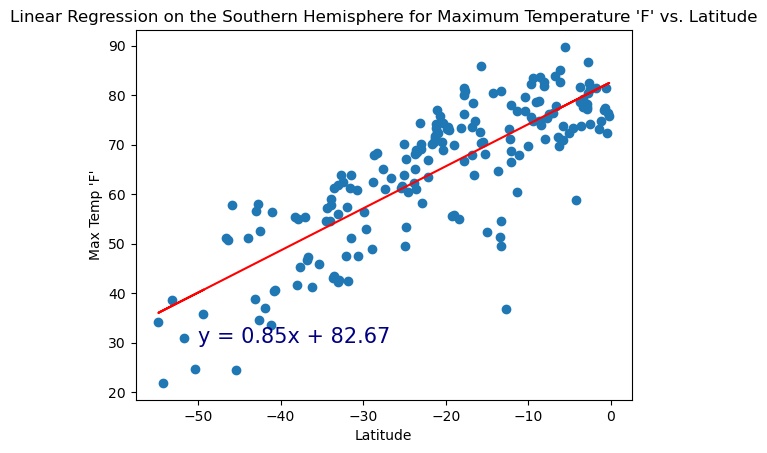

R value is 0.8158164369380237
P value is 2.1522580820759597e-45


In [17]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp 'F'"]

#Call line function
plot_linear_regression(x, y,"Linear Regression on the Southern Hemisphere for Maximum Temperature 'F' vs. Latitude", "Max Temp 'F'", (-50,30))

**Discussion about the linear relationship:** There is a statistically significant relationship between the Maximum Temperature and Latitude in both the Nothern and Southern Hemispheres as demonstrated by both P values. The Northern Hemisphere reports a negative correlation between rising max temperature and increasing latitude as indicated by a -0.63% R value and the Southern Hemisphere reports a strong positive correlation between increasing max temperature and declining latitude as indicated by a 0.85% R value. 

### Humidity vs. Latitude Linear Regression Plot

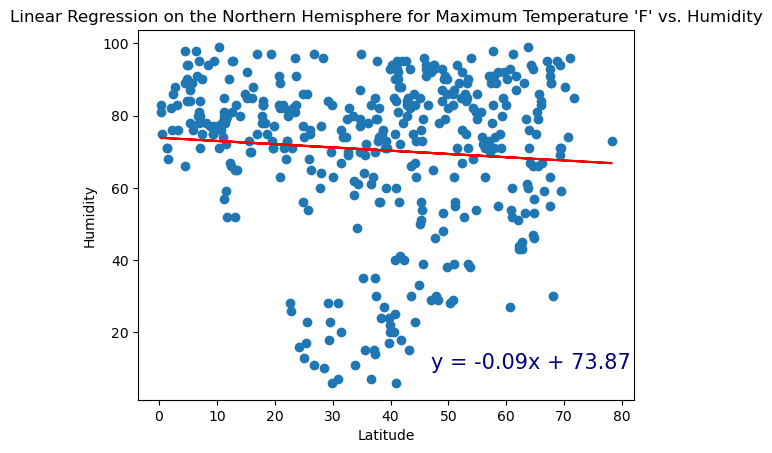

R value is -0.08011204241381885
P value is 0.10964321561309046


In [18]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

#Call line function
plot_linear_regression(x, y,"Linear Regression on the Northern Hemisphere for Maximum Temperature 'F' vs. Humidity", "Humidity", (47,10))

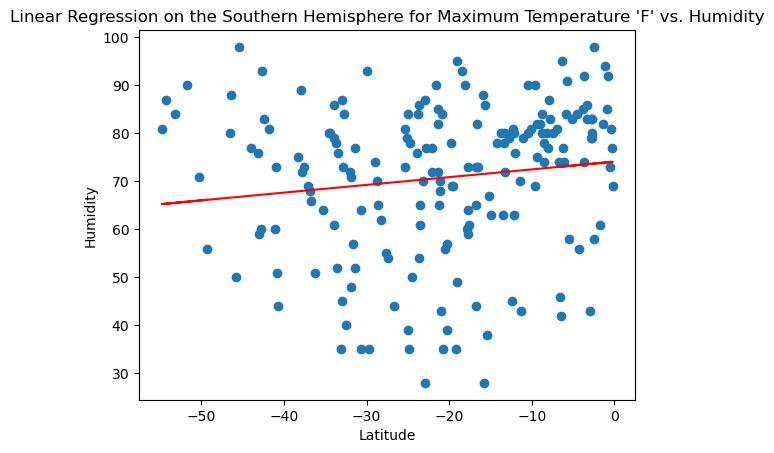

R value is 0.13758703967954503
P value is 0.06181870076034574


In [19]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

#Call line function
plot_linear_regression(x, y,"Linear Regression on the Southern Hemisphere for Maximum Temperature 'F' vs. Humidity", "Humidity", (-55,20))

**Discussion about the linear relationship:** Both the Northern and Southern Hemispheres reported a very weak relationship between humidity and latitude. P values for both regressions indicated that the results wer insignificant (P value > 0.05). Both R values were less than 0.05%.

### Cloudiness vs. Latitude Linear Regression Plot

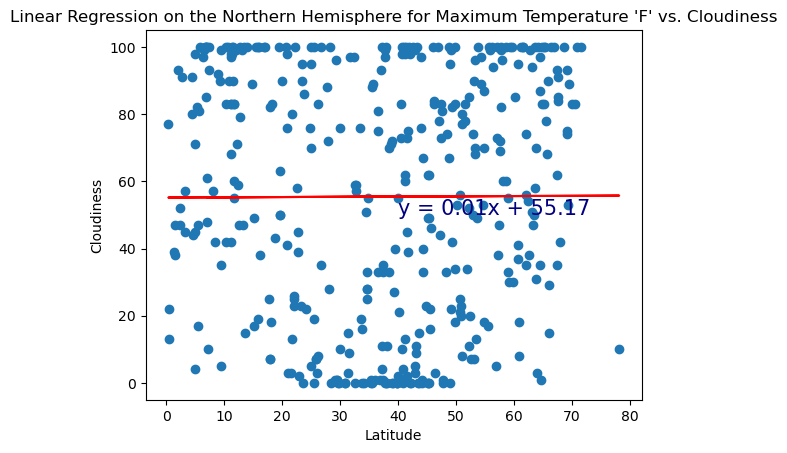

R value is 0.003994119549982358
P value is 0.9365293738979306


In [20]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

#Call line function
plot_linear_regression(x, y,"Linear Regression on the Northern Hemisphere for Maximum Temperature 'F' vs. Cloudiness", "Cloudiness", (40,50))

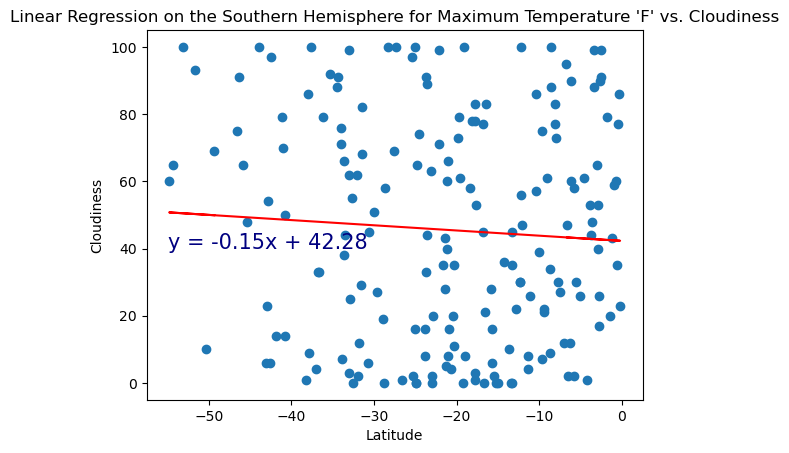

R value is -0.06403659857938265
P value is 0.3865024030697586


In [21]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

#Call line function
plot_linear_regression(x, y,"Linear Regression on the Southern Hemisphere for Maximum Temperature 'F' vs. Cloudiness", "Cloudiness", (-55,40))

**Discussion about the linear relationship:** Both the Northern and Southern Hemispheres reported a weak relationship between cloudiness and latitude. P values for both regressions indicated that the results wer insignificant (P value > 0.05). Both R values were less than 0.07%.

### Wind Speed vs. Latitude Linear Regression Plot

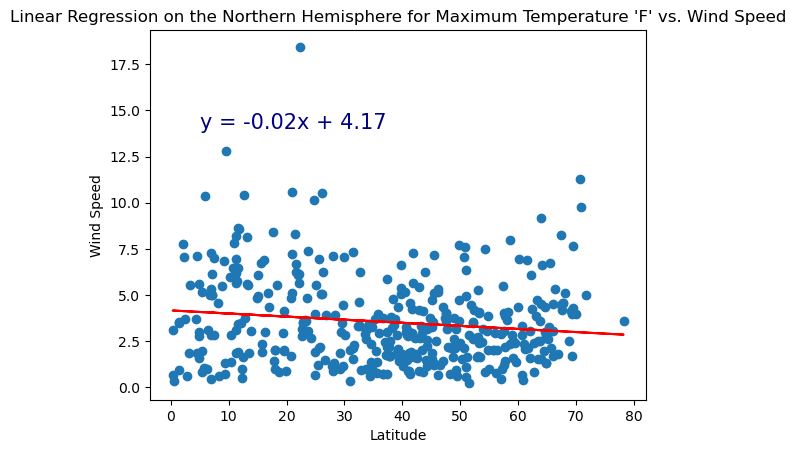

R value is -0.13785546897053944
P value is 0.005750515082813094


In [22]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

#Call line function
plot_linear_regression(x, y,"Linear Regression on the Northern Hemisphere for Maximum Temperature 'F' vs. Wind Speed", "Wind Speed", (5,14))

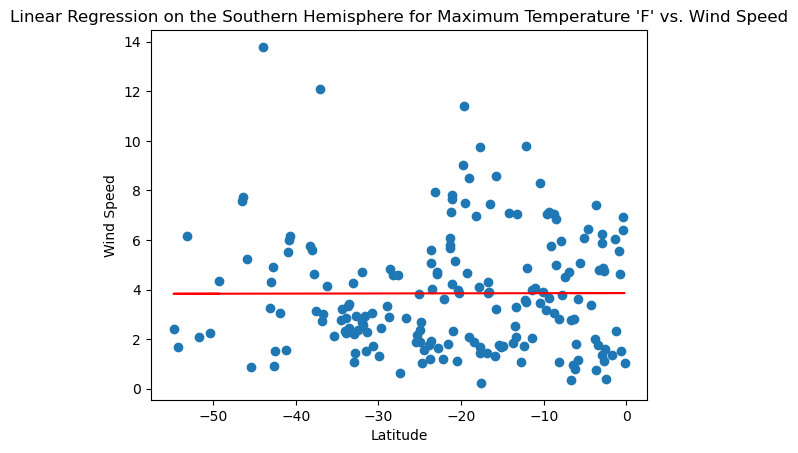

R value is 0.003156839123012027
P value is 0.9659831406439412


In [23]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

#Call line function
plot_linear_regression(x, y,"Linear Regression on the Southern Hemisphere for Maximum Temperature 'F' vs. Wind Speed", "Wind Speed", (-50,15))

**Discussion about the linear relationship:** The Northern Hemisphere reported a statistically significant relationship between wind speed and latitude as evidenced by the 0.005 P value. There was a weak negative correlation between increasing max temperature and increasing latitude as evidenced by the -0.14% R value. The Southern Hemisphere reported a statistically insignificant P value and a weak negative relationship between increasing wind speed and increasing latitude. 